### **Purpose: ** 

In [1]:
player = 'Dennis Hatch'
team = 'a'

In [2]:
import pickle
import pandas as pd

In [3]:
path = '//DREW/Users/andrew/Desktop/mosconi/'
dframe = pickle.load(open(path+'pkl/allyears_clean_locs','rb'))
if 'a' in team.lower():
    df = dframe[dframe['American_player'].str.contains(player)]
    df['Europe_lost'] = ~ df['Europe_won']
    df = df[['Format', 'European_player', 'European_score', 'American_score',
       'American_player', 'Europe_lost','Europe_won']]
    df.columns = ['Format', 'European_player', 'European_score', 'American_score',
       'American_player', 'America_won', 'America_lost']
else:
    df = dframe[dframe['European_player'].str.contains(player)]
    df['Europe_lost'] = ~ df['Europe_won']

c:\users\andrew\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
def stats(df):
    try:
        if 'a' in team.lower():
            win = df['America_won'].sum()
            loss = df['America_lost'].sum()
        else:
            win = df['Europe_won'].sum()
            loss = df['Europe_lost'].sum()
        mp= win+loss
        wl = 'Win-loss: {}-{}'.format(win,loss)
        pct = round(win/(win+loss)*100,0)
        return('Matches Played: {}'.format(mp),wl,'Pct: {}'.format(pct))
    except:
        return('No matches to display')

### Lets have a quick look at his overall stats by checking out his singles, doubles, and team stats.

In [5]:
sing = df[df['Format']=='Singles']
dub = df[df['Format']=='Doubles']
teams = df[df['Format']=='Teams']
triples = df[df['Format']=='Triples'] 

In [6]:
'Overall: {}'.format(stats(df))
'Singles: {}'.format(stats(sing))
'Doubles: {}'.format(stats(dub))
'Teams:   {}'.format(stats(teams))
'Triples: {}'.format(stats(triples))

"Overall: ('Matches Played: 23', 'Win-loss: 11-12', 'Pct: 48.0')"

"Singles: ('Matches Played: 7', 'Win-loss: 4-3', 'Pct: 57.0')"

"Doubles: ('Matches Played: 12', 'Win-loss: 5-7', 'Pct: 42.0')"

"Teams:   ('Matches Played: 4', 'Win-loss: 2-2', 'Pct: 50.0')"

'Triples: No matches to display'

## So he plays better in singles matches (57% vs. 42%) 
### Let's see if he plays better with certain partners. 

In [7]:
if 'a' in team.lower():
    dub = dub[['European_player','American_player','America_won','America_lost']]
    dub['Partner']=dub['American_player'].str.replace(player,'')
    dub['Partner']=dub['Partner'].str.replace('&','')
    dub['Partner']=dub['Partner'].str.strip()
    dub.groupby('Partner').sum().sort_values(['America_won','America_lost'],ascending=False)    
else:
    dub = dub[['European_player','American_player','Europe_won','Europe_lost']]
    dub['Partner']=dub['European_player'].str.replace(player,'')
    dub['Partner']=dub['Partner'].str.replace('&','')
    dub['Partner']=dub['Partner'].str.strip()
    dub.groupby('Partner').sum().sort_values(['Europe_won','Europe_lost'],ascending=False)

,America_won,America_lost
Partner,,
Shane Van Boening,2.0,0.0
Johnny Archer,1.0,2.0
Rodney Morris,1.0,1.0
Óscar Domínguez,1.0,0.0
Brandon Shuff,0.0,1.0
Corey Deuel,0.0,1.0
Earl Strickland,0.0,1.0
Mike Dechaine,0.0,1.0


In [25]:
import qgrid

In [27]:
qgrid.nbinstall()

In [ ]:
%%bash jupyter nbextension enable --py --sys-prefix widgetsnbextension

In [34]:
qgrid.show_grid(dframe)

Widget Javascript not detected.  It may not be installed or enabled properly.


### He plays rather well with Shane.

## Let's see if he performs better or worse against certain opponents in singles matches.

In [8]:
if 'a' in team.lower():
    sing.groupby('European_player').sum().sort_values('America_won',ascending = False)
else:
    sing.groupby('American_player').sum().sort_values('Europe_won',ascending = False)

,America_won,America_lost
European_player,,
Niels Feijen,2.0,0.0
Nick Ekonomopoulos,1.0,0.0
Nick van den Berg,1.0,0.0
Chris Melling,0.0,1.0
Darren Appleton,0.0,1.0
Ralf Souquet,0.0,1.0


## He plays well against Niels Feijen.
## Let's see what his record was for each year.

In [9]:
lst =df.index.values.tolist() 
years = set([])
for item in lst:
    years.add(item[0])
years=list(years)

In [10]:
yearly=[]
for year in years:
    if 'a' in team:
        w = df.loc[year]['America_won'].sum()
        l = df.loc[year]['America_lost'].sum()
    else:
        w = df.loc[year]['Europe_won'].sum()
        l = df.loc[year]['Europe_lost'].sum()
    yearly.append((w,l))

In [11]:
yr= {}
for k,v in zip(years,yearly):
    yr[k]=v

In [12]:
win=[]
loss=[]
pct=[]
for w,l in yearly:
    win.append(w)
    loss.append(l)
    p=round((w*100/(w+l)),0)
    pct.append(p)

In [13]:
yearly

[(5, 1), (3, 3), (3, 3), (0, 5)]

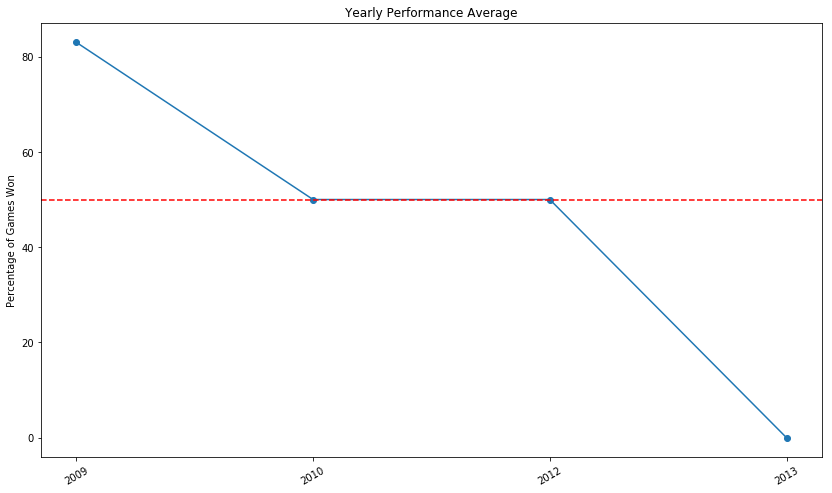

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ind = np.arange(len(years))  # the x locations for the groups

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)

ax.plot(pct,linestyle='-',marker='.',markersize=12)
ax.axhline(50, color='r',linestyle='--')

# add some;
ax.set_ylabel('Percentage of Games Won');
ax.set_title('Yearly Performance Average');
ax.set_xticks(ind);
ax.set_xticklabels( (years),rotation=30 );
# ax.legend( (rects1[0], rects2[0]), ('Wins', 'Losses') );

### So his only bad year was also his most recent: 2013 (0-4)
### Let's check how the team did each year he played.

In [15]:
def wincount(dframe=dframe,years=years,team=team):
    l=0
    w=0
    tie=0
    for year in years:
        f,t = dframe.loc[year]['Europe_won'].value_counts(sort=False)
        print(f,t)
        if f>t:
            l+=1
        elif f<t:
            w+=1
        else:
            tie+=1
    if 'a' in team:
        l,w = w,l
    return 'win-loss-tie: {}-{}-{}'.format(w,l,tie)

In [16]:
wincount()

11 7
8 11
9 11
2 11


'win-loss-tie: 1-3-0'

### So America went 1-3 with him on the team.
### Let's dig a bit deeper to see how big of a factor location has been for his performance.

In [17]:
locs = pickle.load(open(path+'pkl/dloc','rb'))

In [18]:
hm = []
aw = []

for year in years:
    if 'USA' in locs[year]:
        if 'a' in team.lower():
            hm.append(year)
        else:
            aw.append(year)
    else:
        if 'a' in team.lower():
            aw.append(year)
        else:
            hm.append(year)
away = df.loc[aw]
home = df.loc[hm]

In [19]:
'Played home {} times, away {} times'.format(len(hm),len(aw))

'Home Games: {}'.format(stats(home))

'Away Games: {}'.format(stats(away))

'Played home 2 times, away 2 times'

"Home Games: ('Matches Played: 11', 'Win-loss: 5-6', 'Pct: 45.0')"

"Away Games: ('Matches Played: 12', 'Win-loss: 6-6', 'Pct: 50.0')"

### So he plays slightly better in away games (50% vs 45%)

### Let's drill down a bit further to parse out his singles and doubles matches for both home and away 

In [20]:
hsing = stats(home[home['Format']=='Singles'])

In [21]:
hdub = stats(home[home['Format']=='Doubles'])

In [22]:
asing = stats(away[away['Format']=='Singles'])

In [23]:
adub = stats(away[away['Format']=='Doubles'])

In [24]:
'Home Singles: {}'.format(hsing)
'Home Doubles: {}'.format(hdub)
'Away Singles: {}'.format(asing)
'Away Doubles: {}'.format(adub)

"Home Singles: ('Matches Played: 3', 'Win-loss: 2-1', 'Pct: 67.0')"

"Home Doubles: ('Matches Played: 6', 'Win-loss: 2-4', 'Pct: 33.0')"

"Away Singles: ('Matches Played: 4', 'Win-loss: 2-2', 'Pct: 50.0')"

"Away Doubles: ('Matches Played: 6', 'Win-loss: 3-3', 'Pct: 50.0')"

### Home singles is strong (2-1), while home doubles is weak (2-4)

# Summary
- Overall win percentage of 48%
- Plays slightly better in doubles than singles (57% vs 42%)
- Plays well with Shane (2-0) and against Neils (2-0)
- America is 1-3 with him on the team
- Home singles is strong (2-1), home doubles is weak (2-4)
- Mvp performance in his first appearance (2009: (5-1))
- His most recent performance was also his worst (2013: (0-4))